<a href="https://colab.research.google.com/github/vihaankrishna100/AI-Neural-Networks/blob/main/SpamDetection_UsingNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud


In [ ]:
df = pd.read_csv("/content/emails.csv", engine='python')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


<Axes: ylabel='spam'>

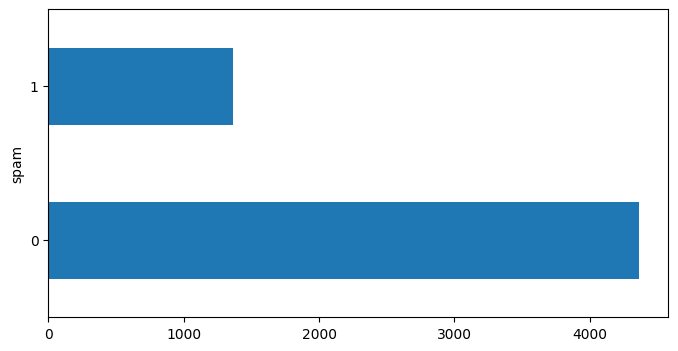

In [ ]:
df.shape
df.spam.value_counts().plot(kind='barh', figsize=(8,4))

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from textwrap import fill
print(fill(', '.join(stopwords.words('english')), width=80))
stop = stopwords.words('english')
df['text_without_sw'] = df['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd,
your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers,
herself, it, it's, its, itself, they, them, their, theirs, themselves, what,
which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be,
been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but,
if, or, because, as, until, while, of, at, by, for, with, about, against,
between, into, through, during, before, after, above, below, to, from, up, down,
in, out, on, off, over, under, again, further, then, once, here, there, when,
where, why, how, all, any, both, each, few, more, most, other, some, such, no,
nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don,
don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't,
couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't,
haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

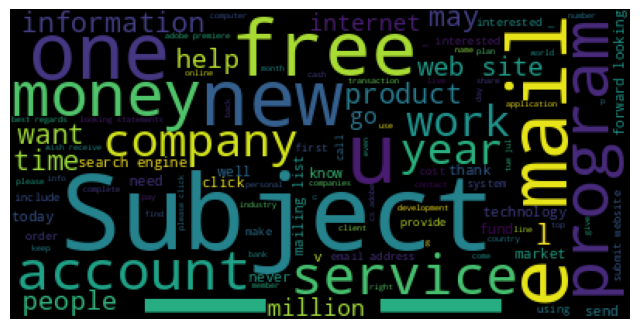

In [ ]:
df_spam = df[df["spam"] == 1]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(df_spam['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


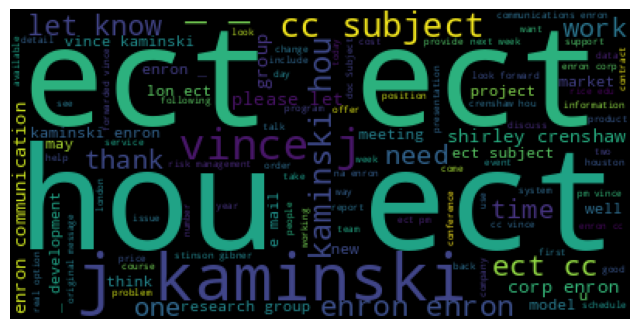

In [ ]:
df_ham = df[df["spam"] == 0]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(df_ham['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


In [ ]:
X = df["text"]
y= df["spam"]

In [ ]:
def clean_text(doc):
  document = re.sub('[^a-zA-Z]', ' ', doc)
  document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)
  document = re.sub(r'\s+', ' ', document)
  return document


In [ ]:
X_sentences = []
reviews = list(X)
for rev in reviews:
  X_sentences.append(clean_text(rev))

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=5,
max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(X_sentences).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = spam_detector.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[849   7]
 [ 18 272]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.97      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

0.9781849912739965


In [ ]:
print(X_sentences[56])
print(y[56])
print(spam_detector.predict(vectorizer.transform([X_sentences[56]])))


Subject localized software all languages available hello we would like to offer localized software versions german french spanish uk and many others aii iisted software is available for immediate downioad no need to wait week for cd deiivery just few exampies norton lnternet security pro windows xp professionai with sp fuil version corei draw graphics suite dreamweaver mx homesite inciudinq macromedia studio mx just browse our site and find any software you need in your native ianguaqe best reqards kayieen 
1
[1]


Spam Detection using Test Reviews Dataset

Accuracy Score using Naive Bayes: 91.3%


In [ ]:
review = pd.read_csv("/content/TestReviews.csv")
review.head()

,review,class
0,"""Alright you bunch of booze bags, go home."" I...",1
1,"""And now the purple dusk of twilight time stea...",1
2,"""Could have bought it in a store"" Hershey ice ...",0
3,"""Do good and be good; not to do any evil, to c...",1
4,"""Flight commander"" Dar was a great balloon pil...",1


<Axes: ylabel='class'>

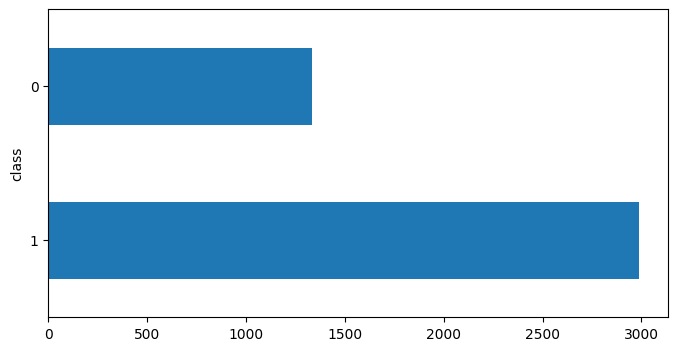

In [ ]:
review.shape
review['class'].value_counts().plot(kind = 'barh', figsize=(8,4))

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from textwrap import fill
print(fill(', '.join(stopwords.words('english')), width=80))
stop = stopwords.words('english')
review['text_without_sw'] = review['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd,
your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers,
herself, it, it's, its, itself, they, them, their, theirs, themselves, what,
which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be,
been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but,
if, or, because, as, until, while, of, at, by, for, with, about, against,
between, into, through, during, before, after, above, below, to, from, up, down,
in, out, on, off, over, under, again, further, then, once, here, there, when,
where, why, how, all, any, both, each, few, more, most, other, some, such, no,
nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don,
don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't,
couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't,
haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

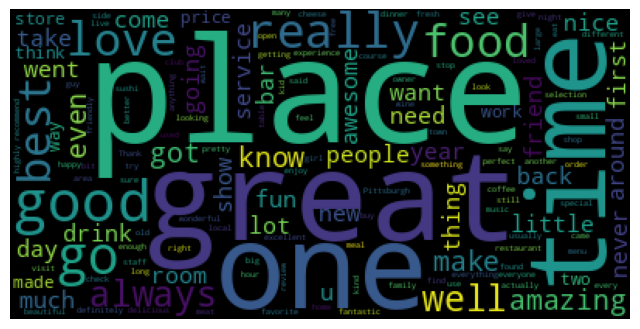

In [ ]:
review_spam = review[review["class"] == 1]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(review_spam['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

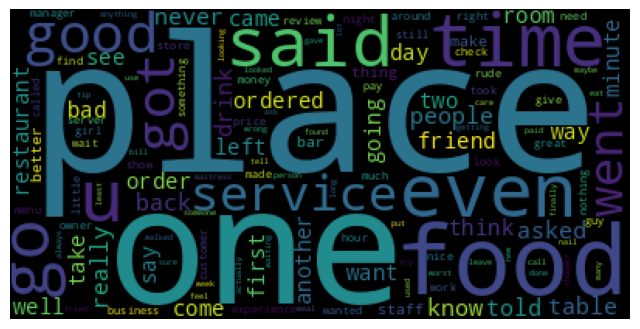

In [ ]:
review_ham = review[review["class"] == 0]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(review_ham['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


In [ ]:
x = review["review"]
Y = review["class"]

In [ ]:
def clean_text(doc):
  document = re.sub('[^a-zA-Z]', ' ', doc)
  document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)
  document = re.sub(r'\s+', ' ', document)
  return document


In [ ]:
x_sentences = []
reviews = list(x)
for rev in reviews:
  x_sentences.append(clean_text(rev))

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=5,
max_df=0.7, stop_words=stopwords.words('english'))
x = vectorizer.fit_transform(x_sentences).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.20, random_state=42)

In [ ]:
spam_detector = MultinomialNB()
spam_detector.fit(x_train, Y_train)

MultinomialNB()

In [ ]:
Y_pred = spam_detector.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[193  67]
 [  8 596]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       260
           1       0.90      0.99      0.94       604

    accuracy                           0.91       864
   macro avg       0.93      0.86      0.89       864
weighted avg       0.92      0.91      0.91       864

0.9131944444444444


In [ ]:
print(x_sentences[56])
print(Y[56])
print(spam_detector.predict(vectorizer.transform([x_sentences[56]])))

A few months ago wrote very positive review of this place Starting about in September however something very odd and unpleasant happened to Cheuvront The lunch service became slow to the point where thought d been forgotten Worse the food started to change in unpleasant ways Gone were the good ingredients and subtle flavorings Suddenly everything was layered on in huge blobs and weighted down with unnecessary spices Specifically m talking about the lunch pizzas had for lunch at Cheuvront so many times before Last time went few weeks ago suddenly noticed that they used nearly four times the cheese necessary Today there was four times the cheese at least two or three times the sauce along with chunks of nearly raw garlic Worse the cheese on my pizza was cool and congealed showing that it had been sitting around for while before the wait staff deigned to bring it to me was embarrassed to have suggested to colleague that we eat at Cheuvront today don know what happened to this restaurant b